In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [26]:
# Load data
cov_matrix = pd.read_excel("covariance_matrix.xlsx", index_col=0)
init_values = pd.read_excel("init_values.xlsx", index_col=0)

# Define constants
delta_t = 1 / 52  # Weekly time step
num_simulations = 10000

# Define the mean vector (mu)
mu = np.array([0, 0.07 * delta_t, 0.06 * delta_t] + [0] * (cov_matrix.shape[0] - 3))

# Convert covariance matrix to numpy
Sigma_PnL = cov_matrix.values

# --- Question 1: Expectation and Covariance ---
# Define holding vector (example: equal weights)
h = np.ones(len(mu))  # Equal weights for all assets

# Expectation of Portfolio PnL
E_portfolio_PnL = h.T @ mu

# Variance of Portfolio PnL
Var_portfolio_PnL = h.T @ Sigma_PnL @ h

# Standard deviation (risk) of Portfolio PnL
Std_portfolio_PnL = np.sqrt(Var_portfolio_PnL)

# Print results for Question 1
print("Expectation of Portfolio PnL:", E_portfolio_PnL)
print("Variance of Portfolio PnL:", Var_portfolio_PnL)
print("Standard Deviation (Risk) of Portfolio PnL:", Std_portfolio_PnL)


Expectation of Portfolio PnL: 0.0025000000000000005
Variance of Portfolio PnL: 0.001791753967759466
Standard Deviation (Risk) of Portfolio PnL: 0.04232911489459077


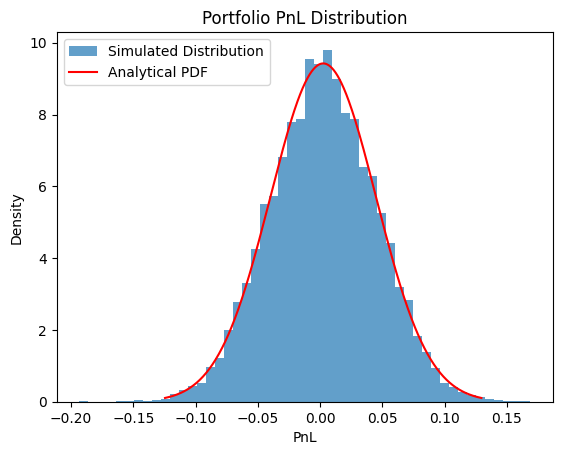

In [13]:
# --- Question 2: Simulating PnL Distribution ---
# Simulate Portfolio PnL
portfolio_pnl = np.random.normal(E_portfolio_PnL, Std_portfolio_PnL, size=num_simulations)

# Plot simulated distribution
plt.hist(portfolio_pnl, bins=50, density=True, alpha=0.7, label="Simulated Distribution")
x = np.linspace(E_portfolio_PnL - 3 * Std_portfolio_PnL, E_portfolio_PnL + 3 * Std_portfolio_PnL, 500)
plt.plot(x, norm.pdf(x, E_portfolio_PnL, Std_portfolio_PnL), 'r-', label="Analytical PDF")
plt.xlabel("PnL")
plt.ylabel("Density")
plt.title("Portfolio PnL Distribution")
plt.legend()
plt.show()

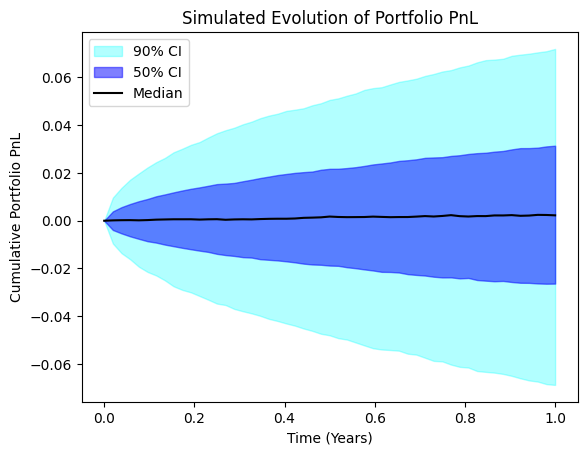

In [14]:
# --- Question 4: Fan Chart for Simulated Portfolio PnL ---
time_steps = 52  # Number of weeks
time_points = np.linspace(0, 1, time_steps + 1)
sim_pnl_paths = []

for _ in range(num_simulations):
    # Simulate weekly PnL increments
    weekly_pnl = np.random.multivariate_normal(mu * delta_t, Sigma_PnL * delta_t, size=time_steps)
    cumulative_pnl = np.cumsum(weekly_pnl @ h)
    sim_pnl_paths.append(np.insert(cumulative_pnl, 0, 0))  # Add initial PnL = 0

sim_pnl_paths = np.array(sim_pnl_paths)

# Calculate percentiles for fan chart
percentiles = np.percentile(sim_pnl_paths, [5, 25, 50, 75, 95], axis=0)

# Plot fan chart
plt.fill_between(time_points, percentiles[0], percentiles[4], color='cyan', alpha=0.3, label="90% CI")
plt.fill_between(time_points, percentiles[1], percentiles[3], color='blue', alpha=0.5, label="50% CI")
plt.plot(time_points, percentiles[2], color='black', label="Median")
plt.xlabel("Time (Years)")
plt.ylabel("Cumulative Portfolio PnL")
plt.title("Simulated Evolution of Portfolio PnL")
plt.legend()
plt.show()


In [20]:
import numpy as np
import pandas as pd
from scipy.stats import norm, multivariate_normal

# Læs data fra Excel-filer
cov_matrix = pd.read_excel('covariance_matrix.xlsx', index_col=0)
init_values = pd.read_excel('init_values.xlsx', index_col=0)

# Antag et tidsstep, for eksempel 1/52 for en uges horisont (hvis det er givet)
dt = 1/52
mu = np.array([0, 0.07 * dt, 0.06 * dt, 0, 0])  # Tilpas efter antallet af aktiver

# Konverter kovariansmatrix til numpy array
Sigma = cov_matrix.values

# Sikr, at Sigma har de korrekte dimensioner (5x5 i dette tilfælde)
if Sigma.shape != (5, 5):
    Sigma = Sigma[:5, :5]  # Skær ned til de første 5x5, hvis den er større

# Definér matrix A (5x5) - Denne skal tilpasses dine behov
# Eksempel: En identitetsmatrix, eller brug din egen logik for at generere A
A = np.eye(5)  # Bruges som eksempel (5x5 identitetsmatrix)

# Beregn forventet PnL-vektor
PnL_vector_mean = A @ mu  # (5x5) @ (5x1) -> (5x1)

# Beregn kovariansmatrix for PnL-vektoren
PnL_vector_cov = A @ Sigma @ A.T  # (5x5) @ (5x5) @ (5x5) = (5x5)

# Udskriv resultater
print("PnL_vector_mean:", PnL_vector_mean)
print("PnL_vector_cov:", PnL_vector_cov)


PnL_vector_mean: [0.         0.00134615 0.00115385 0.         0.        ]
PnL_vector_cov: [[ 1.12779512e-04  3.84203518e-05 -4.70984341e-06  1.47038681e-07
  -2.01053129e-07]
 [ 3.84203518e-05  4.28008869e-04  3.36015614e-04 -9.50256938e-08
  -2.10575331e-06]
 [-4.70984341e-06  3.36015614e-04  4.65448341e-04 -5.82510706e-08
  -1.13113195e-06]
 [ 1.47038681e-07 -9.50256938e-08 -5.82510706e-08  9.57696430e-08
   5.26444374e-08]
 [-2.01053129e-07 -2.10575331e-06 -1.13113195e-06  5.26444374e-08
   3.31605593e-07]]
